<a href="https://colab.research.google.com/github/tosmeley/project_folder/blob/main/Skin_problems_detection_YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries Preparation

**Clone and Install YOLO V5 library provided by ultralytics on GitHub with some other libraries needed for this project**

In [ ]:
# Clone and Install libraries
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

# Import libraries
import torch 
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.4/78.2 GB disk)


# Dataset Preparation

## Mount google drive

**Mount Google Drive to connect the account where the dataset is located**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Download Dataset

**We're going to make URL endpoint to make it easier to get the file from the google drive directory**

In [ ]:
# Import libraries
import os

# Make URL endpoint for every part of the dataset image and labels
root_dir = '/content/drive/MyDrive/Jasin paper/dataset/images_augment_1920'

train_img_dir = os.path.join(root_dir, 'images/train/')
val_img_dir = os.path.join(root_dir, 'images/val/')
test_img_dir = os.path.join(root_dir, 'images/test/')

# path for dataset with 6 labels/classes
train_lbl_dir = os.path.join(root_dir, 'labels/train/')
val_lbl_dir = os.path.join(root_dir, 'labels/val/')
test_lbl_dir = os.path.join(root_dir, 'labels/test/')

# path for dataset with 4 labels/classes
# train_lbl_dir = os.path.join(root_dir, 'labels_1/train/')
# val_lbl_dir = os.path.join(root_dir, 'labels_1/val/')

# path for dataset with 1 label/classes
# train_lbl_dir = os.path.join(root_dir, 'labels_2/train/')
# val_lbl_dir = os.path.join(root_dir, 'labels_2/val/')

**Get all the file inside the URL to be shown as an example on the next step**

In [ ]:
train_img = os.listdir(train_img_dir)     # url : /content/drive/MyDrive/AI_final_project/images/train/...
val_img = os.listdir(val_img_dir)         # url : /content/drive/MyDrive/AI_final_project/images/val/...
test_img = os.listdir(test_img_dir)         
train_lbl = os.listdir(train_lbl_dir)     # url : /content/drive/MyDrive/AI_final_project/labels/train/...
val_lbl = os.listdir(val_lbl_dir)         # url : /content/drive/MyDrive/AI_final_project/labels/val/...
test_lbl = os.listdir(test_lbl_dir)         

# Sort the result
train_img = sorted(train_img)
val_img = sorted(val_img)
test_img = sorted(test_img)
train_lbl = sorted(train_lbl)
val_lbl = sorted(val_lbl)
test_lbl = sorted(test_lbl)

**Using matplotlib, we're going to show a sample image from the train and val dataset**

**a. Train Image**

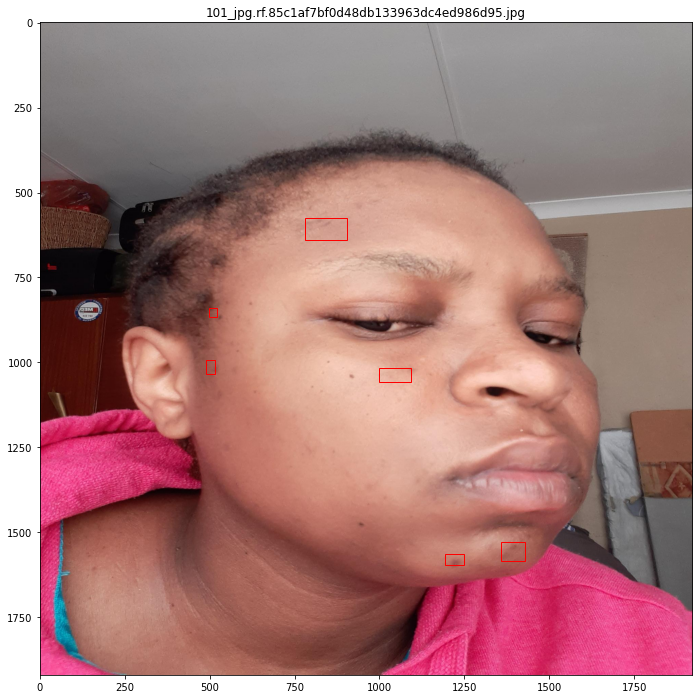

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches

# load the image
img = plt.imread(train_img_dir + train_img[4])
height, width, channels = img.shape

# create a figure and axis
fig, ax = plt.subplots(1, figsize=(20, 12))

# show the image
ax.imshow(img)

# read the text file
with open(train_lbl_dir + train_lbl[4], 'r') as f:
    lines = f.readlines()

# parse the text file
for line in lines:
    # split the line into values
    values = line.split()

    # get the class and bounding box coordinates
    class_name = values[0]
    x_min = float(values[1]) * width - 25
    y_min = float(values[2]) * height - 25
    x_max = float(values[3]) * width
    y_max = float(values[4]) * height

    # create a Rectangle patch
    rect = patches.Rectangle((x_min, y_min), x_max, y_max, linewidth=1, edgecolor='r', facecolor='none')
    
    # add the patch to the axis
    ax.add_patch(rect)

# show the figure
plt.title(train_img[4])
plt.show()

**b. Validation Image**

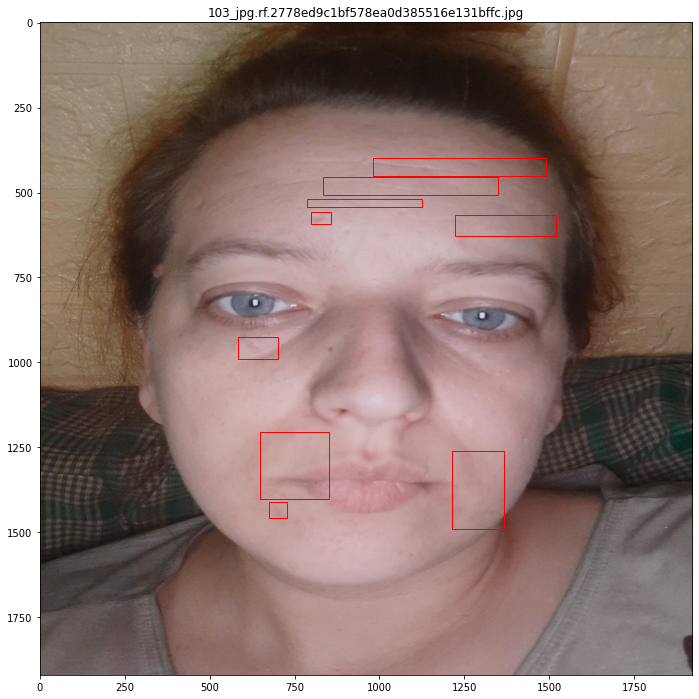

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches

# load the image
img = plt.imread(val_img_dir + val_img[0])
height, width, channels = img.shape

# create a figure and axis
fig, ax = plt.subplots(1, figsize=(20, 12))

# show the image
ax.imshow(img)

# read the text file
with open(val_lbl_dir + val_lbl[0], 'r') as f:
    lines = f.readlines()

# parse the text file
for line in lines:
    # split the line into values
    values = line.split()

    # get the class and bounding box coordinates
    class_name = values[0]
    x_min = float(values[1]) * width - 25
    y_min = float(values[2]) * height - 25
    x_max = float(values[3]) * width
    y_max = float(values[4]) * height

    # create a Rectangle patch
    rect = patches.Rectangle((x_min, y_min), x_max, y_max, linewidth=1, edgecolor='r', facecolor='none')
    
    # add the patch to the axis
    ax.add_patch(rect)

# show the figure
plt.title(val_img[0])
plt.show()

# Train Model

Upload the custom_data.yaml data inside the data /yolov5/data folder

custom-data.yaml :

```
# change the path depends on the google drive directory
path: /content/drive/MyDrive/AI_final_project      # Path to main folder of train and val
train: images/train                                # train images
val: images/val                                    # val images
test:  images/test

# List all classes and make sure the number is match with the YOLO V5 annotation index
names:
  0: acne
  1: blackhead
  2: dark circles
  3: dry skin
  4: enlarged pores
  5: wrinkles

```



**Train the YOLO v5 model using train.py python file provided by Ultralytics**

**hyperparameter of this training process:**<br>
img : 1920 (image resolution)<br>
batch : 2<br>
epochs : 100<br>
total classes : 6

In [ ]:
# Train YOLOv5s
!python train.py --img 1920 --batch 2 --epochs 100 --data /content/yolov5/data/custom_data.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/data/custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=2, imgsz=1920, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.

# Validate Model (Optional)

**Validate the YOLO v5 model using train.py python file provided by Ultralytics**

**--half** is used to apply the FP16 half-precision inference on the validation process
<br><br>
**Some other parameter :**
<br>
**--verbose** is used to report the mAP by class <br>
**--save-txt** is used to save the result to a .txt file <br>
**--save-conf** is used to save the confidences in --save-txt labels

In [ ]:
# Validate YOLOv5s on COCO val
!python val.py --weights /content/yolov5/runs/train/exp/weights/best.pt --data custom_data.yaml --img 1920 --half

val: data=/content/yolov5/data/custom_data.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-23-g5dc1ce4 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/.shortcut-targets-by-id/19XjDTFJT0k7v8sojJZxdqHoyMHTELCPv/AI final project/labels/val.cache... 138 images, 0 backgrounds, 0 corrupt: 100% 138/138 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [00:29<00:00,  5.85s/it]
                   all        138       2005      0.689       0.13      0.076      0.026
                  acne  

# Test

In [ ]:
# Validate YOLOv5s on COCO val
!python test.py --weights /content/yolov5/runs/train/exp/weights/best.pt --data custom_data.yaml --img 1920 --half

# Make prediction with the model result

## Detect from a video file

**Upload your video.mp4 or any other video file**

**Notes:**
<br>
**--conf** is used as a treshold to make the prediction. If the confidence is above 0.25, the bounding box will be shown on the video.
<br>
**--save-txt** is used to save the text output of all the detected object on the video.

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --save-txt --source ../video.mp4

detect: weights=['runs/train/exp/weights/best.pt'], source=../video.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-23-g5dc1ce4 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/379) /content/video.mp4: 640x384 2 acnes, 12.1ms
video 1/1 (2/379) /content/video.mp4: 640x384 1 acne, 9.5ms
video 1/1 (3/379) /content/video.mp4: 640x384 2 acnes, 1 dark circles, 9.5ms
video 1/1 (4/379) /content/video.mp4: 640x384 2 acnes, 9.5ms
video 1/1 (5/379) /content/video.mp4: 640x384 1 acne, 9.5ms
video 1/1 (6/379) /content/video.mp

**Result example:**

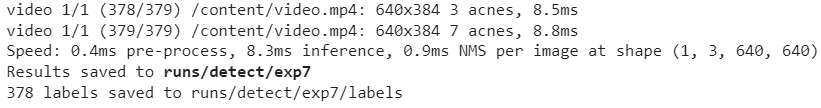

As you can see the result is saved to the runs/detect/exp(n) directory. The video can be downloaded and played to see the result.

## Detect from a webcam (can only be run on jupyter notebook)

In [ ]:
!python detect.py --source 0 --weights runs/train/exp6/weights/best.pt

detect: weights=['runs/train/exp6/weights/best.pt'], source=0, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-18-gd7955fe Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

[ WARN:0@5.360] global /io/opencv/modules/videoio/src/cap_v4l.cpp (902) open VIDEOIO(V4L2:/dev/video0): can't open camera by index
Traceback (most recent call last):
  File "detect.py", line 259, in <module>
    main(opt)
  File "detect.py", line 254, in main
    run(**vars(opt))
  File "/